# LDA(Linear Discriminant Analysis)

核心思想：最大化类间距离以及最小化类内距离。

数学基础：
- 方差
- 平均值（期望）
- 协方差矩阵
- 高斯密度函数
- 投影
- 特征向量

## 使用LDA做分类

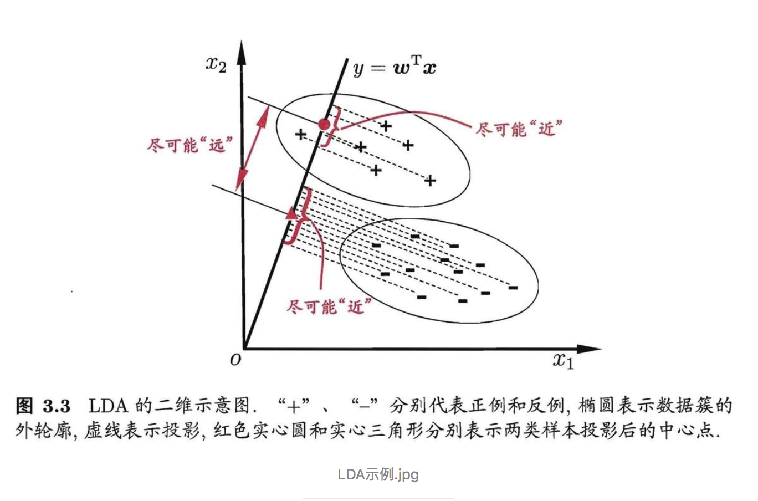

## LDA进行降维

In [19]:
from IPython.display import Image
%matplotlib inline

In [5]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                     'machine-learning-databases/wine/wine.data',
                     header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:
# 
# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
import numpy as np

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [9]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [10]:
print(S_W)
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

[[ 5.0722e+01  3.1007e+00 -7.9323e+00 -5.7848e+00 -2.8879e+00  7.8990e+00
   2.4543e+00  9.3932e-01  9.0781e-01  1.5486e+01  7.0293e+00 -1.8659e+00
   4.9370e+00]
 [ 3.1007e+00  9.0179e+01  4.7074e+00  1.4750e+01 -1.0900e+01 -8.8059e-02
   9.7797e-01  8.4547e+00  4.4732e+00 -1.4494e+01 -2.0361e+01  3.5876e+00
  -1.1176e+01]
 [-7.9323e+00  4.7074e+00  1.1189e+02  7.0126e+01  2.2213e+01  1.5505e+01
   1.4856e+01  2.0454e+01 -2.3344e+00  1.3787e+00  5.6585e+00  8.1917e+00
   3.2570e-01]
 [-5.7848e+00  1.4750e+01  7.0126e+01  9.2147e+01  1.2485e+01  6.2091e+00
   6.2783e+00  1.2735e+01 -4.7597e+00 -4.1511e+00  1.1779e+00  1.1633e+01
  -4.5296e+00]
 [-2.8879e+00 -1.0900e+01  2.2213e+01  1.2485e+01  1.0605e+02  1.0950e+01
   5.2875e+00 -2.1136e+01  1.3076e+01  5.9930e+00  8.4568e+00 -5.3128e-01
   1.1845e+01]
 [ 7.8990e+00 -8.8059e-02  1.5505e+01  6.2091e+00  1.0950e+01  5.7194e+01
   2.8971e+01 -7.4850e+00  3.0810e+01  1.5516e+01  6.6816e-01  1.9382e+01
   6.3808e+00]
 [ 2.4543e+00  9.7797e

In [11]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [12]:
print(S_W)

[[ 1.2448  0.0967 -0.1276 -0.1105 -0.0726  0.2374  0.0753  0.0231  0.1102
   0.4261  0.1411 -0.0155  0.1224]
 [ 0.0967  2.2666  0.1168  0.3517 -0.2622 -0.0467 -0.0186  0.2194  0.0187
  -0.3939 -0.4167  0.0787 -0.2492]
 [-0.1276  0.1168  2.6024  1.6442  0.5364  0.3947  0.3191  0.4553 -0.0353
   0.06    0.167   0.1987 -0.0081]
 [-0.1105  0.3517  1.6442  2.1604  0.325   0.1535  0.1222  0.273  -0.0824
  -0.068   0.0336  0.2548 -0.1201]
 [-0.0726 -0.2622  0.5364  0.325   2.4397  0.2384  0.1433 -0.5166  0.2566
   0.1445  0.1777 -0.0058  0.2509]
 [ 0.2374 -0.0467  0.3947  0.1535  0.2384  1.352   0.6416 -0.0781  0.7644
   0.4392  0.0177  0.4359  0.1554]
 [ 0.0753 -0.0186  0.3191  0.1222  0.1433  0.6416  0.6968 -0.2588  0.5765
   0.3851 -0.0408  0.2525  0.0748]
 [ 0.0231  0.2194  0.4553  0.273  -0.5166 -0.0781 -0.2588  2.1795 -0.2801
  -0.0363  0.1208 -0.332  -0.1485]
 [ 0.1102  0.0187 -0.0353 -0.0824  0.2566  0.7644  0.5765 -0.2801  2.1792
   0.6795 -0.1815  0.2323  0.1568]
 [ 0.4261 -0.3939  

In [13]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [15]:
print(S_B)

[[ 73.2779   5.1521  29.3409 -37.8053  35.3288  27.8688  24.4037 -10.917
   11.9293  51.2816   0.2198  -0.3445  73.9711]
 [  5.1521  33.8209   5.5342  17.6688  -3.0595 -41.4067 -51.4514  32.9397
  -31.0444  36.0237 -47.4845 -53.4785 -18.4551]
 [ 29.3409   5.5342  12.1084 -13.0286  13.5707   6.6597   4.2554  -0.8742
    1.4687  23.8967  -4.84    -5.6837  27.1642]
 [-37.8053  17.6688 -13.0286  31.8532 -21.5944 -40.7237 -44.8903  26.1101
  -25.5242  -6.7623 -28.9705 -32.2968 -52.5343]
 [ 35.3288  -3.0595  13.5707 -21.5944  17.9512  20.621   20.5742 -10.8479
   11.0338  19.3529   7.9757   8.6902  39.5823]
 [ 27.8688 -41.4067   6.6597 -40.7237  20.621   66.8061  78.1916 -47.8401
   45.861  -22.5142  61.6487  69.1515  58.7931]
 [ 24.4037 -51.4514   4.2554 -44.8903  20.5742  78.1916  92.6119 -57.1978
   54.6364 -34.4354  75.5525  84.8261  62.2248]
 [-10.917   32.9397  -0.8742  26.1101 -10.8479 -47.8401 -57.1978  35.584
  -33.8973  25.0189 -47.8855 -53.8    -34.852 ]
 [ 11.9293 -31.0444   1.46

In [16]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


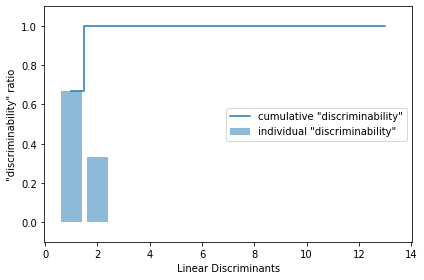

In [21]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [23]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


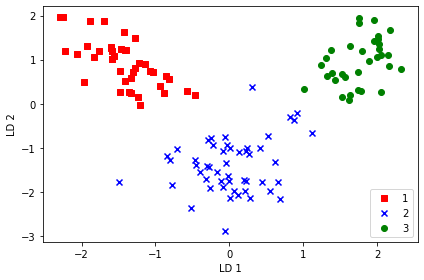

In [24]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


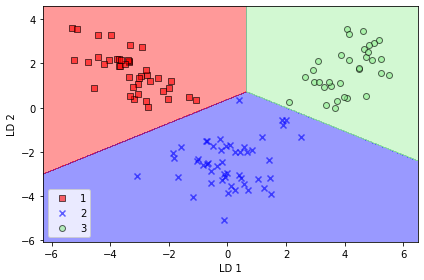

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


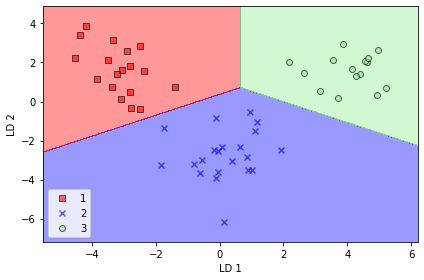

In [29]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

## LDA和PCA的区别

相似点：
- 都是求某个矩阵的特征值，投影矩阵即为该特征值对应的特征向量。

差异：
- PCA为非监督降维，LDA为监督降维
- PCA希望投影后的数据方差尽可能大，尽可能的分散；而LDA希望投影后组内方差小，组间方差大。LDA能合理的运用标签信息，使投影后的维度具有判别性，不同类别数据尽可能的分开。
- 有标签尽可能使用LDA，没有标签使用PCA。